In [57]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
target = np.load('jobchange_test_target_values.npy')
print(target)

[1. 0. 1. ... 0. 0. 0.]


In [3]:
len(target)

2129

In [4]:
#!pip install numpy --upgrade
#!pip install pandas --upgrade --user

In [5]:
#load the dataset
hr_train = pd.read_csv('archive/aug_train.csv')
hr_test = pd.read_csv('archive/aug_test.csv')
#hr_train.info()
#check number of nan values
print(hr_train.isnull().sum())
hr_train = hr_train.fillna("na")
hr_test = hr_test.fillna("na")
hr_total = pd.concat([hr_train, hr_test])
display(hr_total)
hr_total.describe()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,na,na,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,na,No relevent experience,Full time course,Graduate,STEM,5,na,na,never,83,0.0
3,33241,city_115,0.789,na,No relevent experience,na,Graduate,Business Degree,<1,na,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,na,Public Sector,4,15,NaN
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,na,na,2,30,NaN
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,na,3,na,Pvt Ltd,never,18,NaN
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,na,7,100-500,Public Sector,1,84,NaN


,enrollee_id,city_development_index,training_hours,target
count,21287.000000,21287.000000,21287.000000,19158.000000
mean,16873.983652,0.828462,65.328510,0.249348
std,9612.131237,0.123537,60.075201,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.500000,0.739000,23.000000,0.000000
50%,16967.000000,0.903000,47.000000,0.000000
75%,25161.500000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
# x_train = hr_train.iloc[:, 1:13]
y_train = hr_train.iloc[:, 13]
# x_test = hr_test.iloc[:, 1:13]
y_test = pd.DataFrame({'target':target})
y_test
#y_train

,target
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
2124,0.0
2125,1.0
2126,0.0
2127,0.0


In [70]:
#set datatype to categorical
hr_total["city"] = hr_total["city"].astype("category")
hr_total["gender"] = hr_total["gender"].astype("category")
hr_total["relevent_experience"] = hr_total["relevent_experience"].astype("category")
hr_total["enrolled_university"] = hr_total["enrolled_university"].astype("category")
hr_total["education_level"] = hr_total["education_level"].astype("category")
hr_total["major_discipline"] = hr_total["major_discipline"].astype("category")
hr_total["experience"] = hr_total["experience"].astype("category")
hr_total["company_size"] = hr_total["company_size"].astype("category")
hr_total["company_type"] = hr_total["company_type"].astype("category")
hr_total["last_new_job"] = hr_total["last_new_job"].astype("category")
x_total = hr_total.iloc[:, 1:13]
x_total.reset_index(drop=True,inplace=True)
x_total.info()
x_total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   city                    21287 non-null  category
 1   city_development_index  21287 non-null  float64 
 2   gender                  21287 non-null  category
 3   relevent_experience     21287 non-null  category
 4   enrolled_university     21287 non-null  category
 5   education_level         21287 non-null  category
 6   major_discipline        21287 non-null  category
 7   experience              21287 non-null  category
 8   company_size            21287 non-null  category
 9   company_type            21287 non-null  category
 10  last_new_job            21287 non-null  category
 11  training_hours          21287 non-null  int64   
dtypes: category(10), float64(1), int64(1)
memory usage: 548.5 KB


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,na,na,1,36
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,city_21,0.624,na,No relevent experience,Full time course,Graduate,STEM,5,na,na,never,83
3,city_115,0.789,na,No relevent experience,na,Graduate,Business Degree,<1,na,Pvt Ltd,never,52
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...
21282,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,na,Public Sector,4,15
21283,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,na,na,2,30
21284,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,na,3,na,Pvt Ltd,never,18
21285,city_102,0.804,Male,Has relevent experience,Full time course,High School,na,7,100-500,Public Sector,1,84


In [8]:
x_train = x_total.iloc[0:19158]
x_test = x_total.iloc[19158:]
x_test

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,na,1,21
1,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,na,Pvt Ltd,1,98
2,city_21,0.624,Male,No relevent experience,no_enrollment,High School,na,<1,na,Pvt Ltd,never,15
3,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...
2124,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,na,Public Sector,4,15
2125,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,na,na,2,30
2126,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,na,3,na,Pvt Ltd,never,18
2127,city_102,0.804,Male,Has relevent experience,Full time course,High School,na,7,100-500,Public Sector,1,84


In [9]:
x_train.corr(method='spearman', min_periods=1)

,city_development_index,training_hours
city_development_index,1.000000,0.007491
training_hours,0.007491,1.000000


In [10]:
#check nan
x_total.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [14]:
#convert the categorical features as one hot key encode
features = x_total.columns.tolist()
features.remove('training_hours')
features.remove('city_development_index')
enc = OneHotEncoder()
enc.fit(x_total[features])
x_total_new = pd.DataFrame(enc.transform(x_total[features]).toarray())
# x_total_new
# x_total[['city_development_index','training_hours']]
x_total_hot = pd.concat([x_total[['city_development_index','training_hours']], x_total_new], axis=1)
x_total_hot

,city_development_index,training_hours,0,1,2,3,4,5,6,7,...,182,183,184,185,186,187,188,189,190,191
0,0.920,36,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.776,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.624,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.789,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.767,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,0.920,15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21283,0.897,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21284,0.887,18,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21285,0.804,84,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# convert the string categorical values into integer code
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(x_total[features])
x_total_encoded = x_total.copy()
x_total_encoded[features] = pd.DataFrame(data_encoded, columns=features)
x_total_encoded

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5.0,0.920,1.0,0.0,3.0,0.0,5.0,21.0,8.0,6.0,0.0,36
1,77.0,0.776,1.0,1.0,3.0,0.0,5.0,6.0,4.0,5.0,4.0,47
2,64.0,0.624,3.0,1.0,0.0,0.0,5.0,15.0,8.0,6.0,6.0,83
3,14.0,0.789,3.0,1.0,2.0,0.0,1.0,20.0,8.0,5.0,6.0,52
4,50.0,0.767,1.0,0.0,3.0,2.0,5.0,21.0,4.0,1.0,3.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
21282,5.0,0.920,1.0,1.0,3.0,0.0,2.0,7.0,8.0,4.0,3.0,15
21283,30.0,0.897,1.0,0.0,3.0,2.0,5.0,9.0,8.0,6.0,1.0,30
21284,2.0,0.887,1.0,1.0,3.0,4.0,6.0,13.0,8.0,5.0,6.0,18
21285,4.0,0.804,1.0,0.0,0.0,1.0,6.0,17.0,1.0,4.0,0.0,84


In [16]:
x_train_encoded = x_total_encoded.iloc[0:19158]
x_test_encoded = x_total_encoded.iloc[19158:]
x_train_hot = x_total_hot.iloc[0:19158]
x_test_hot = x_total_hot.iloc[19158:]

In [17]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x_total_encoded.values, i) for i in range(12)]
vif["Features"] = x_total_encoded.columns.tolist()
vif
#VIF of city_development_index, major_discipline and company_type > 10, suggest that these features have high correlation with other features

,VIF,Features
0,2.597309,city
1,23.696090,city_development_index
2,3.347223,gender
3,1.853435,relevent_experience
4,5.265730,enrolled_university
5,1.564225,education_level
6,18.696301,major_discipline
7,4.747555,experience
8,4.499394,company_size
9,12.339114,company_type


In [18]:
# check multicollinearity for categorical variables
features_ = ['city','gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline','experience','company_size','company_type','last_new_job','training_hours']
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x_total_encoded[features_].values, i) for i in range(len(features_))]
vif["Features"] = features_
vif

,VIF,Features
0,2.562169,city
1,3.337068,gender
2,1.843548,relevent_experience
3,4.326716,enrolled_university
4,1.561807,education_level
5,13.384645,major_discipline
6,4.505036,experience
7,4.486332,company_size
8,11.226577,company_type
9,2.001746,last_new_job


In [19]:
x_total_encoded.corr()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
city,1.000000,-0.326401,0.048744,0.004055,-0.077969,0.000788,0.103186,-0.040638,0.025783,0.021541,-0.002192,0.012164
city_development_index,-0.326401,1.000000,-0.154525,-0.061513,0.174675,0.042311,-0.100611,0.037506,-0.057504,-0.032206,-0.023410,-0.000556
gender,0.048744,-0.154525,1.000000,0.101377,-0.103976,0.061157,0.067342,-0.000832,0.064733,0.048085,0.071135,-0.000253
relevent_experience,0.004055,-0.061513,0.101377,1.000000,-0.375678,0.111030,0.094060,-0.009276,0.343024,0.183901,0.225463,-0.010896
enrolled_university,-0.077969,0.174675,-0.103976,-0.375678,1.000000,0.054276,-0.146998,0.025958,-0.207237,-0.095922,-0.049998,0.003460
education_level,0.000788,0.042311,0.061157,0.111030,0.054276,1.000000,0.189896,0.015508,0.081904,0.036625,0.123193,-0.002112
major_discipline,0.103186,-0.100611,0.067342,0.094060,-0.146998,0.189896,1.000000,-0.007106,0.074033,0.061026,0.096790,0.007401
experience,-0.040638,0.037506,-0.000832,-0.009276,0.025958,0.015508,-0.007106,1.000000,0.028507,0.014613,0.054968,-0.005417
company_size,0.025783,-0.057504,0.064733,0.343024,-0.207237,0.081904,0.074033,0.028507,1.000000,0.340155,0.191824,-0.002363
company_type,0.021541,-0.032206,0.048085,0.183901,-0.095922,0.036625,0.061026,0.014613,0.340155,1.000000,0.173835,-0.011983


In [20]:
features0 = ['city','gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline','experience','company_size','last_new_job','training_hours']
vif0 = pd.DataFrame()
vif0["VIF"] = [variance_inflation_factor(x_total_encoded[features0].values, i) for i in range(len(features0))]
vif0["Features"] = features0
vif0

,VIF,Features
0,2.549910,city
1,3.304668,gender
2,1.827083,relevent_experience
3,4.138631,enrolled_university
4,1.556754,education_level
5,11.067705,major_discipline
6,4.436600,experience
7,3.946603,company_size
8,1.983145,last_new_job
9,2.124474,training_hours


In [21]:
features1 = ['city','gender', 'relevent_experience', 'enrolled_university', 'education_level', 'experience','company_size','last_new_job','training_hours']
vif1 = pd.DataFrame()
vif1["VIF"] = [variance_inflation_factor(x_total_encoded[features1].values, i) for i in range(len(features1))]
vif1["Features"] = features1
vif1

,VIF,Features
0,2.313789,city
1,3.029927,gender
2,1.796058,relevent_experience
3,3.538005,enrolled_university
4,1.521130,education_level
5,3.939346,experience
6,3.658283,company_size
7,1.965712,last_new_job
8,2.044319,training_hours


In [22]:
#Naive Bayes with all the features,OrdinalEncoder
nb = GaussianNB()
nb.fit(x_train_encoded, y_train)
y_pred_nb = nb.predict(x_test_encoded)
accuracy_score(y_test, y_pred_nb)

0.751526538280883

In [23]:
print('accuracy is',accuracy_score(y_test, y_pred_nb))
print('confusion matrix is')
print(confusion_matrix(y_test, y_pred_nb))
pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_nb)).iloc[0:3]

accuracy is 0.751526538280883
confusion matrix is
[[1313  240]
 [ 289  287]]


,0,1
0,0.81960,0.544592
1,0.84546,0.498264
2,0.83233,0.520399


In [26]:
#Naive Bayes without city_development_index, major_discipline and company_type
nb = GaussianNB()
nb.fit(x_train_encoded[features1], y_train)
y_pred_nb = nb.predict(x_test_encoded[features1])
accuracy_score(y_test, y_pred_nb)

0.7219351808360732

In [27]:
print('accuracy is',accuracy_score(y_test, y_pred_nb))
print('confusion matrix is')
print(confusion_matrix(y_test, y_pred_nb))
pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_nb)).iloc[0:3]

accuracy is 0.7219351808360732
confusion matrix is
[[1379  174]
 [ 418  158]]


,0,1
0,0.767390,0.475904
1,0.887959,0.274306
2,0.823284,0.348018


In [28]:
#Naive Bayes with all the features,one-hot encode,not good,maybe because too much features compared with number of data points
nb = GaussianNB()
nb.fit(x_train_hot, y_train)
y_pred_nb = nb.predict(x_test_hot)
accuracy_score(y_test, y_pred_nb)

0.5382808830436825

In [29]:
print('accuracy is',accuracy_score(y_test, y_pred_nb))
print('confusion matrix is')
print(confusion_matrix(y_test, y_pred_nb))
pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_nb)).iloc[0:3]

accuracy is 0.5382808830436825
confusion matrix is
[[677 876]
 [107 469]]


,0,1
0,0.863520,0.348699
1,0.435930,0.814236
2,0.579375,0.488287


In [77]:
#SVM (not good)
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear',gamma='auto')
clf_svm.fit(x_train_encoded, y_train)
y_pred_svm = clf_svm.predict(x_test_encoded)

In [85]:
print('accuracy is',accuracy_score(y_test, y_pred_svm))
print('confusion matrix is')
print(confusion_matrix(y_test, y_pred_svm))
pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_svm)).iloc[0:3]

accuracy is 0.7294504462188821
confusion matrix is
[[1553    0]
 [ 576    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1
0,0.729450,0.0
1,1.000000,0.0
2,0.843563,0.0


In [52]:
#one-class svm OrdinalEncoder
X_train, X_test, Y_train, Y_test = train_test_split(x_train_encoded, y_train, test_size=0.2, random_state=10)
X_train_non = X_train[Y_train == 0]
error = []
gamma_space = np.arange(0.0003,0.005,0.0003)
for gamma in gamma_space:
    clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=gamma)
    clf.fit(X_train_non)
    y_pred_test = clf.predict(X_test)
    y_pred_test[y_pred_test==1] = 0
    y_pred_test[y_pred_test==-1] = 1
    error.append(1-accuracy_score(Y_test, y_pred_test))

best gamme 0.0006 total error 0.2938413361169102


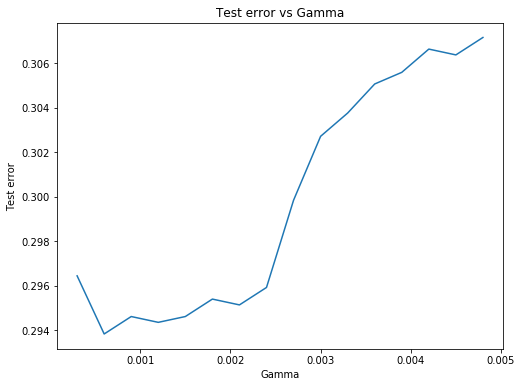

In [53]:
fig = plt.figure(figsize=(8,6))
plt.plot(gamma_space,error)
plt.xlabel('Gamma')
plt.ylabel('Test error')
plt.title('Test error vs Gamma')
best_gamma = gamma_space[np.argmin(error)]
print('best gamme',best_gamma,'total error',min(error))

In [54]:
x_train_encoded_non = x_train_encoded[y_train == 0]
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.0006)
clf.fit(x_train_encoded_non)
y_pred_test = clf.predict(x_test_encoded)
y_pred_test[y_pred_test==1] = 0
y_pred_test[y_pred_test==-1] = 1

In [55]:
print('accuracy is',accuracy_score(y_test, y_pred_test))
print('confusion matrix is')
print(confusion_matrix(y_test, y_pred_test))
pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_test)).iloc[0:3]

accuracy is 0.678252700798497
confusion matrix is
[[1383  170]
 [ 515   61]]


,0,1
0,0.728662,0.264069
1,0.890534,0.105903
2,0.801507,0.151177


In [40]:
#one-class svm one-hot key no improvement
x_train_hot_non = x_train_hot[y_train == 0]
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.0009)
clf.fit(x_train_hot_non)
y_pred_test = clf.predict(x_test_hot)
y_pred_test[y_pred_test==1] = 0
y_pred_test[y_pred_test==-1] = 1

In [41]:
print('accuracy is',accuracy_score(y_test, y_pred_test))
print('confusion matrix is')
print(confusion_matrix(y_test, y_pred_test))
pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_test)).iloc[0:3]

accuracy is 0.6735556599342414
confusion matrix is
[[1388  165]
 [ 530   46]]


,0,1
0,0.723670,0.218009
1,0.893754,0.079861
2,0.799770,0.116900


In [44]:
#logistic regression
clf_lr = LogisticRegression(random_state=0,max_iter=1000).fit(x_train_encoded, y_train)
y_pred_lr = clf_lr.predict(x_test_encoded)

In [45]:
print('accuracy is',accuracy_score(y_test, y_pred_lr))
print('confusion matrix is')
print(confusion_matrix(y_test, y_pred_lr))
pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_lr)).iloc[0:3]

accuracy is 0.754814466885862
confusion matrix is
[[1458   95]
 [ 427  149]]


,0,1
0,0.773475,0.610656
1,0.938828,0.258681
2,0.848168,0.363415


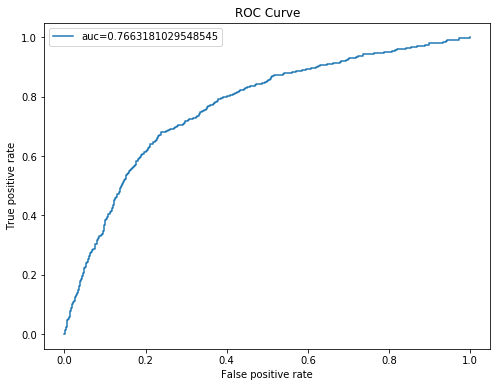

In [51]:
y_pred_proba = clf_lr.predict_proba(x_test_encoded)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
fig = plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

In [65]:
#logistic regression one-hot key
clf_lr = LogisticRegression(random_state=0,max_iter=1000).fit(x_train_hot, y_train)
y_pred_lr = clf_lr.predict(x_test_hot)

In [66]:
print('accuracy is',accuracy_score(y_test, y_pred_lr))
print('confusion matrix is')
print(confusion_matrix(y_test, y_pred_lr))
pd.DataFrame(precision_recall_fscore_support(y_test, y_pred_lr)).iloc[0:3]

accuracy is 0.7703147017379052
confusion matrix is
[[1423  130]
 [ 359  217]]


,0,1
0,0.798541,0.625360
1,0.916291,0.376736
2,0.853373,0.470206


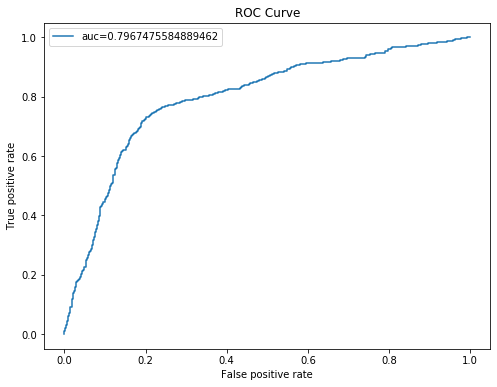

In [67]:
y_pred_proba = clf_lr.predict_proba(x_test_hot)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
fig = plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

In [59]:
#random forest
X_train, X_test, Y_train, Y_test = train_test_split(x_train_encoded, y_train, test_size=0.2, random_state=12)
error = []
num_tree = np.arange(1,100,3)
for n in num_tree:
    clf_rf = RandomForestClassifier(n_estimators = n,criterion='entropy',max_depth=10,min_samples_leaf=20,random_state=8)
    clf_rf.fit(X_train, Y_train)
    y_pred = clf_rf.predict(X_test)
    error.append(1-accuracy_score(Y_test, y_pred))

Text(0.5, 1.0, 'Test error vs number of trees')

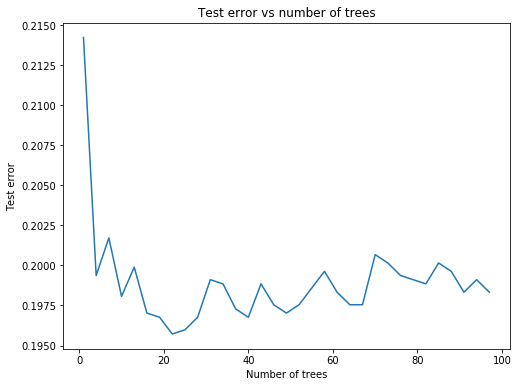

In [62]:
fig = plt.figure(figsize=(8,6))
plt.plot(num_tree,error,label = 'Random Forest')
plt.xlabel('Number of trees')
plt.ylabel('Test error')
plt.title('Test error vs number of trees')

In [63]:
clf_rf = RandomForestClassifier(n_estimators = 21,criterion='entropy',max_depth=10,min_samples_leaf=20,random_state=8)
clf_rf.fit(x_train_encoded, y_train)
y_pred = clf_rf.predict(x_test_encoded)

In [64]:
print('accuracy is',accuracy_score(y_test, y_pred))
print('confusion matrix is')
print(confusion_matrix(y_test, y_pred))
pd.DataFrame(precision_recall_fscore_support(y_test, y_pred)).iloc[0:3]

accuracy is 0.7782996712071395
confusion matrix is
[[1358  195]
 [ 277  299]]


,0,1
0,0.830581,0.605263
1,0.874437,0.519097
2,0.851945,0.558879


In [68]:
#random forest one-hot key, not good
X_train, X_test, Y_train, Y_test = train_test_split(x_train_hot, y_train, test_size=0.2, random_state=12)
error = []
num_tree = np.arange(1,100,3)
for n in num_tree:
    clf_rf = RandomForestClassifier(n_estimators = n,criterion='entropy',max_depth=10,min_samples_leaf=20,random_state=8)
    clf_rf.fit(X_train, Y_train)
    y_pred = clf_rf.predict(X_test)
    error.append(1-accuracy_score(Y_test, y_pred))

Text(0.5, 1.0, 'Test error vs number of trees')

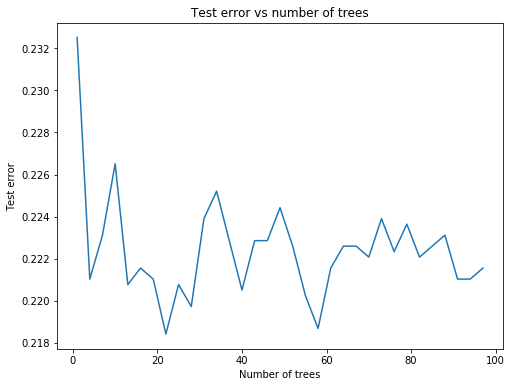

In [69]:
fig = plt.figure(figsize=(8,6))
plt.plot(num_tree,error,label = 'Random Forest')
plt.xlabel('Number of trees')
plt.ylabel('Test error')
plt.title('Test error vs number of trees')